## **Install BigDL Chronos**

In [1]:
# Install latest pre-release version of bigdl-chronos 
# Installing bigdl-chronos from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-chronos[all]
!pip uninstall -y torchtext
exit() # restart the runtime to refresh installed pkg

     |████████████████████████████████| 222 kB 5.5 MB/s 
     |████████████████████████████████| 2.2 MB 42.8 MB/s 
     |████████████████████████████████| 23.6 MB 1.6 MB/s 
     |████████████████████████████████| 100.7 MB 55 kB/s 
     |████████████████████████████████| 71.0 MB 386 bytes/s 
     |████████████████████████████████| 35.4 MB 471 kB/s 
     |████████████████████████████████| 218.4 MB 50 kB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 57.6 MB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 53.8 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 51.4 MB/s 
     |████████████████████████████████| 144 kB 46.5 MB/s 
     |████████████████████████████████| 197 kB 60.2 MB/s 
     |████████████████████████████████| 173 kB 59.8 MB/s 
     |████████████████████████████████| 128 kB 59.2 MB/s 
     |████████████

## **Import data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
f = open('/content/drive/MyDrive/Courses/DS104_Distributed-And-Parallel-Computing/Đồ-án-DS104/dataset/stock_prices.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
with open('data.json', 'w') as f:
    json.dump(data['data'], f)

In [3]:
df = pd.read_json('data.json')
df

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,VCB,2022-01-20,15:01:03,HOSE,STOCK,86.8,92.8,80.8,85.2,87.5,83.1,87.1,85.660,85.200,87.500,83.100,87.100,85.660,2794300,239372970000,0,0,0.3,0.3000,0.3456
1,VCB,2022-01-19,15:01:02,HOSE,STOCK,87.6,93.7,81.5,87.5,87.5,85.0,86.8,86.330,87.500,87.500,85.000,86.800,86.330,914800,78972420000,500000,41500000000,-0.8,-0.8000,-0.9132
2,VCB,2022-01-18,15:01:03,HOSE,STOCK,86.2,92.2,80.2,85.5,87.6,84.0,87.6,86.350,85.500,87.600,84.000,87.600,86.350,1696600,146506850000,39000,3412500000,1.4,1.4000,1.6241
3,VCB,2022-01-17,15:01:03,HOSE,STOCK,83.4,89.2,77.6,83.0,88.0,82.3,86.2,85.640,83.000,88.000,82.300,86.200,85.640,2628500,225104290000,40030,3476541000,2.8,2.8000,3.3573
4,VCB,2022-01-14,15:01:03,HOSE,STOCK,81.9,87.6,76.2,81.9,83.4,81.0,83.4,82.770,81.900,83.400,81.000,83.400,82.770,1522100,125980020000,30000,2307000000,1.5,1.5000,1.8315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,VCB,2013-01-08,14:01:05,HOSE,STOCK,30.0,31.5,28.5,30.6,31.5,30.1,31.5,30.809,12.872,13.251,12.663,13.251,12.959,1035220,31894000000,0,0,1.5,0.6310,5.0000
2255,VCB,2013-01-07,14:01:04,HOSE,STOCK,29.2,30.6,27.8,28.0,30.0,28.0,30.0,29.373,11.779,12.620,11.779,12.620,12.357,1312740,38559000000,0,0,0.8,0.3365,2.7397
2256,VCB,2013-01-04,14:01:07,HOSE,STOCK,28.5,29.9,27.1,28.0,29.5,27.8,29.2,28.821,11.779,12.410,11.695,12.283,12.124,501540,14455000000,0,0,0.7,0.2945,2.4561
2257,VCB,2013-01-03,14:01:06,HOSE,STOCK,27.8,29.1,26.5,27.9,28.5,27.0,28.5,28.050,11.737,11.989,11.358,11.989,11.801,500650,14043000000,0,0,0.7,0.2945,2.5180


In [4]:
df = df.sort_values(by="date", ignore_index=True)
df

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,VCB,2013-01-02,14:01:04,HOSE,STOCK,27.2,28.5,25.9,27.2,27.8,27.2,27.8,27.576,11.443,11.695,11.443,11.695,11.600,168190,4638000000,0,0,0.6,0.2524,2.2059
1,VCB,2013-01-03,14:01:06,HOSE,STOCK,27.8,29.1,26.5,27.9,28.5,27.0,28.5,28.050,11.737,11.989,11.358,11.989,11.801,500650,14043000000,0,0,0.7,0.2945,2.5180
2,VCB,2013-01-04,14:01:07,HOSE,STOCK,28.5,29.9,27.1,28.0,29.5,27.8,29.2,28.821,11.779,12.410,11.695,12.283,12.124,501540,14455000000,0,0,0.7,0.2945,2.4561
3,VCB,2013-01-07,14:01:04,HOSE,STOCK,29.2,30.6,27.8,28.0,30.0,28.0,30.0,29.373,11.779,12.620,11.779,12.620,12.357,1312740,38559000000,0,0,0.8,0.3365,2.7397
4,VCB,2013-01-08,14:01:05,HOSE,STOCK,30.0,31.5,28.5,30.6,31.5,30.1,31.5,30.809,12.872,13.251,12.663,13.251,12.959,1035220,31894000000,0,0,1.5,0.6310,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,VCB,2022-01-14,15:01:03,HOSE,STOCK,81.9,87.6,76.2,81.9,83.4,81.0,83.4,82.770,81.900,83.400,81.000,83.400,82.770,1522100,125980020000,30000,2307000000,1.5,1.5000,1.8315
2255,VCB,2022-01-17,15:01:03,HOSE,STOCK,83.4,89.2,77.6,83.0,88.0,82.3,86.2,85.640,83.000,88.000,82.300,86.200,85.640,2628500,225104290000,40030,3476541000,2.8,2.8000,3.3573
2256,VCB,2022-01-18,15:01:03,HOSE,STOCK,86.2,92.2,80.2,85.5,87.6,84.0,87.6,86.350,85.500,87.600,84.000,87.600,86.350,1696600,146506850000,39000,3412500000,1.4,1.4000,1.6241
2257,VCB,2022-01-19,15:01:02,HOSE,STOCK,87.6,93.7,81.5,87.5,87.5,85.0,86.8,86.330,87.500,87.500,85.000,86.800,86.330,914800,78972420000,500000,41500000000,-0.8,-0.8000,-0.9132


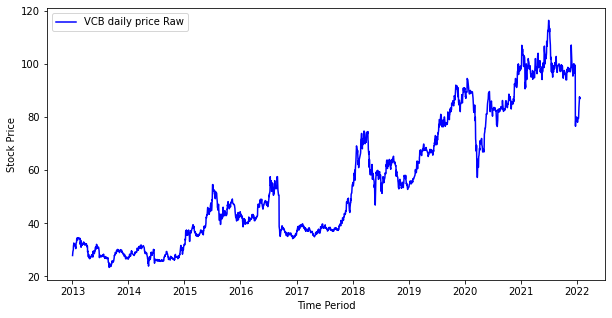

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(df.date, df.close, color='blue', label='VCB daily price Raw')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## **Predict with Chronos AutoTS**

### **Step 1: Init Orca Context** 

In [6]:
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://analytics-zoo.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details. Note that argument ```init_ray_on_spark``` must be ```True``` for Chronos.

In [7]:
# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True) # run in local mode

#init_orca_context(cluster_mode="k8s", master="k8s://https://<k8s-apiserver-host>:<k8s-apiserver-port>", container_image="intelanalytics/bigdl-k8s:latest", num_nodes=2, cores=2, init_ray_on_spark=True, conda_name='Anaconda3-5.1.0-Linux-x86_64') # run on K8s cluster

#init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2, init_ray_on_spark=True) # run on Hadoop YARN cluster

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
2022-01-29 16:26:31 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-01-29 16:26:34,459 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-29 16:26:34,463 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-29 16:26:34,467 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-29 16:26:34,468 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-01-29 16:26:34 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-01-29 16:26:34 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

22-01-29 16:26:35 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
2022-01-29 16:26:35 WARN  SparkContext:66 - Using an existing SparkContext; some configuration may not take effect.
22-01-29 16:26:35 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JTensor
BigDLBasePickler registering: bigdl.dllib.utils.common  JTensor
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JActivity
BigDLBasePickler registering: bigdl.dllib.utils.common  JActivity
Successfully got a SparkContext


2022-01-29 16:26:39,477	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-01-29_16-26-36_191224_353/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-01-29_16-26-36_191224_353/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-01-29_16-26-36_191224_353', 'metrics_export_port': 59440, 'node_id': '11e7b481bef60e34b72201dc827e20168e63195e4a82e72db7d7496d'}


<SparkContext master=local[4] appName=pyspark-shell>

### **Step 2: Data transformation and feature engineering using Chronos TSDataset**
[TSDataset](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/tsdataset.html) is our abstract of time series dataset for data transformation and feature engineering. Here we use it to preprocess the data.

In [8]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, # the dataframe to load
                                                              dt_col="date",  # the column name specifying datetime
                                                              target_col="close", # the column name to predict
                                                              with_split=True, # split the dataset into 3 parts
                                                              val_ratio=0.1, # validation set ratio
                                                              test_ratio=0.1) # test set ratio

# for each tsdataset, we 
# 1. generate datetime feature columns.
# 2. impute the dataset with last occured value.
# 3. scale the dataset with standard scaler, fit = true for train data.
#standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    # tsdata.gen_dt_feature()\
    #       .impute(mode="last")\
    #       .scale(standard_scaler, fit=(tsdata is tsdata_train))
    tsdata.impute(mode="last")\
          .scale(minmax_scaler, fit=(tsdata is tsdata_train))

    #tsdata.scale(standard_scaler, fit=(tsdata is tsdata_train))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Step 3: Create an AutoTSEstimator**


[AutoTSEstimator](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html) is our Automated TimeSeries Estimator for time series forecasting task.

In [9]:
import bigdl.orca.automl.hp as hp
from bigdl.chronos.autots import AutoTSEstimator
auto_estimator = AutoTSEstimator(model='seq2seq', # the model name used for training
                                 search_space='normal', # a default hyper parameter search space
                                 past_seq_len=50, future_seq_len=1, # hp sampling function of past_seq_len for auto-tuning
                                 selected_features='auto') 

### **Step 4: Fit with AutoTSEstimator**

In [10]:
# fit with AutoTSEstimator for a returned TSPipeline
ts_pipeline = auto_estimator.fit(data=tsdata_train, # train dataset
                                 validation_data=tsdata_val, # validation dataset
                                 batch_size=hp.choice([16,32,64]),
                                 epochs=50) # number of epochs to train in each trial

2022-01-29 16:26:44,499	WARNING function_runner.py:562 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True
train_func_3f79e_00001,PENDING,,64,0.11896,0.00293052,32,1,True
train_func_3f79e_00002,PENDING,,64,0.0233529,0.00315787,64,1,True
train_func_3f79e_00003,PENDING,,32,0.115752,0.00211526,16,2,True
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False


(ImplicitFunc pid=630) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=630)   import pandas.util.testing as tm
(ImplicitFunc pid=630) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10644294626773135 and num_layers=1
(ImplicitFunc pid=630)   "num_layers={}".format(dropout, num_layers))
(ImplicitFunc pid=629) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=629)   import pandas.util.testing as tm
(ImplicitFunc pid=629) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option add

Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False


(ImplicitFunc pid=732) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=732)   import pandas.util.testing as tm
(ImplicitFunc pid=730) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=730)   import pandas.util.testing as tm


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,1,3.76726,0.072043,0.072043
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,,,,
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,,,,
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,,,,
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


(ImplicitFunc pid=730) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.02335288686649025 and num_layers=1
(ImplicitFunc pid=730)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,2,10.7307,0.00974289,0.00974289
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,3,7.23643,0.000985669,0.000985669
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,1,4.13409,0.0123929,0.0123929
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,,,,
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,4,17.4129,0.00445386,0.00445386
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,5,11.7989,0.000985669,0.00159135
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,3,10.6919,0.000922505,0.000922505
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,1,7.73897,0.0929782,0.0929782
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,5,21.02,0.00334457,0.00334457
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,7,18.3979,0.000985669,0.00145267
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,4,14.7432,0.000922505,0.00128039
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,2,15.295,0.00943633,0.00943633
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,7,29.7965,0.00242891,0.00242891
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,8,21.2988,0.000985669,0.00106353
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,5,19.8791,0.000922505,0.0012533
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,2,15.295,0.00943633,0.00943633
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,8,33.0903,0.00171432,0.00171432
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,11,28.2152,0.000985669,0.00127853
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,7,26.4006,0.000787106,0.000808328
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,3,23.174,0.0044728,0.0044728
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,10,39.2636,0.00123388,0.00123388
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,14,35.0256,0.000985669,0.00102165
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,9,32.8092,0.000787106,0.00090561
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,4,29.5582,0.0044728,0.00552272
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,12,45.6288,0.00111289,0.00143124
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,16,39.6005,0.000937675,0.000937675
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,10,36.1667,0.000737554,0.000737554
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,5,35.7618,0.0044728,0.00585545
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,14,52.1936,0.00107612,0.00122222
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,18,44.0582,0.000899357,0.000995071
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,12,42.4982,0.000737554,0.000846761
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,6,41.9986,0.0044728,0.00518428
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,15,55.4859,0.000836685,0.000836685
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,21,50.6108,0.000702207,0.000702207
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,14,49.1564,0.00069158,0.00069158
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,7,48.2036,0.003224,0.003224
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,17,61.9641,0.000836685,0.000909121
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,23,55.0321,0.000679384,0.000679384
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,16,55.5337,0.00069158,0.000827299
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,8,54.5487,0.00288906,0.00288906
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,18,65.2893,0.000836685,0.00118083
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,26,61.7551,0.000651461,0.000651461
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,17,58.7704,0.000645472,0.000645472
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,9,60.8409,0.00288906,0.00500697
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,20,71.6361,0.000717724,0.000962132
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,28,66.3403,0.000646218,0.000646218
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,19,64.9978,0.000640826,0.000713435
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,9,60.8409,0.00288906,0.00500697
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,22,78.2591,0.000676709,0.000676709
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,30,70.8243,0.000625719,0.000774231
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,21,71.3439,0.000637382,0.000637382
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,10,67.0855,0.00288906,0.00348451
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,23,81.5092,0.000676709,0.000807564
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,33,77.8894,0.000606314,0.000612194
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,22,74.719,0.000637382,0.00145924
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,11,73.3843,0.00180243,0.00180243
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,25,87.5877,0.000676709,0.00069501
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,35,82.4698,0.00058547,0.00058547
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,24,81.1379,0.000619131,0.000793696
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,12,79.7668,0.00178143,0.00178143
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,27,93.9347,0.000657312,0.000913018
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,37,87.0153,0.00058547,0.000671886
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,25,84.2355,0.000619131,0.000749758
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,13,86.0425,0.00125315,0.00125315
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,28,97.0834,0.000657312,0.000663147
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,40,93.8587,0.000579264,0.000579264
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,27,90.6534,0.000604011,0.000604011
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,14,92.2428,0.00116271,0.00116271
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,30,103.605,0.000644208,0.0009289
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,42,98.3943,0.000566275,0.000885363
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,29,96.8888,0.000604011,0.000845859
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,14,92.2428,0.00116271,0.00116271
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,32,109.99,0.000644208,0.000904463
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,44,103.207,0.00055542,0.00055542
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,31,103.101,0.000604011,0.000750989
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,15,98.8623,0.00112004,0.00112004
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,34,116.344,0.000644208,0.000677234
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,47,109.993,0.00055542,0.00080754
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,33,109.536,0.000604011,0.000681805
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,16,104.671,0.00112004,0.00169954
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,36,122.838,0.000638165,0.000638165
train_func_3f79e_00001,RUNNING,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,49,114.685,0.000547829,0.000547829
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,34,112.82,0.000604011,0.000930801
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,17,111.223,0.0010728,0.0010728
train_func_3f79e_00004,PENDING,,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,37,126.13,0.000638165,0.000644929
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,36,119.353,0.00058817,0.00059042
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,18,117.478,0.0010728,0.00124207
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,,,,
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,39,132.68,0.000638165,0.000800208
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,38,125.742,0.00058817,0.000637242
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,19,123.683,0.000919852,0.000919852
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,1,6.80316,0.00928756,0.00928756
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,40,135.96,0.000638165,0.000910217
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,39,129.111,0.00058817,0.000596342
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,20,129.821,0.000919852,0.0010501
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,2,13.6562,0.00209612,0.00209612
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,42,142.246,0.000597054,0.000597054
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,41,135.774,0.00058817,0.000807601
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,21,136.109,0.000901567,0.000901567
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,2,13.6562,0.00209612,0.00209612
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,44,148.77,0.000597054,0.000638029
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,42,138.851,0.00058817,0.000628248
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,21,136.109,0.000901567,0.000901567
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,3,20.6488,0.00209612,0.00280281
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,45,152.035,0.000597054,0.000750031
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,44,145.247,0.00058817,0.000618454
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,22,142.547,0.000773621,0.000773621
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,4,27.4197,0.00125439,0.00125439
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,47,158.695,0.000597054,0.00105318
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,46,151.752,0.00058817,0.000602001
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,23,148.764,0.000773621,0.000850129
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,5,34.048,0.00125439,0.00139573
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,RUNNING,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,49,165.258,0.000597054,0.000627332
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,47,155.007,0.000587582,0.000587582
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,24,155.154,0.000773621,0.00141543
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,6,40.8785,0.00125439,0.00389882
train_func_3f79e_00005,PENDING,,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00002,RUNNING,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,49,161.228,0.000587582,0.000826857
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,25,161.767,0.000773621,0.00104148
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,6,40.8785,0.00125439,0.00389882
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,PENDING,,32,0.263561,0.00398837,16,1,False,,,,
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,


(ImplicitFunc pid=730) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.26356119526184946 and num_layers=1
(ImplicitFunc pid=730)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,26,168.34,0.000773621,0.00103207
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,7,47.6038,0.00107292,0.00107292
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,1,2.9634,0.00595694,0.00595694
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,26,168.34,0.000773621,0.00103207
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,8,54.4569,0.00105361,0.00105361
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,,,,
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,3,8.68889,0.00301391,0.00301391
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,27,174.559,0.000720801,0.000720801
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,9,61.0836,0.000823152,0.000823152
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,1,14.9376,0.00282477,0.00282477
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,5,14.611,0.00143978,0.00143978
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,28,180.979,0.000720801,0.000743444
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,10,67.5551,0.000823152,0.000884069
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,1,14.9376,0.00282477,0.00282477
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,7,20.6621,0.00143978,0.00157234
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,29,187.04,0.000720801,0.00091657
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,11,74.2345,0.000823152,0.00163031
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,2,29.5731,0.00172402,0.00172402
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,8,23.5894,0.0012127,0.0012127
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,30,193.207,0.000720801,0.00140882
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,11,74.2345,0.000823152,0.00163031
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,2,29.5731,0.00172402,0.00172402
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,10,29.4873,0.000853366,0.00182929
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,31,199.444,0.000701929,0.000701929
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,12,80.9646,0.00073996,0.00073996
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,2,29.5731,0.00172402,0.00172402
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,12,35.2085,0.000853366,0.0015498
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,32,205.662,0.000701929,0.000918261
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,13,87.3912,0.00073996,0.00116467
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,3,44.4138,0.00167159,0.00167159
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,14,40.9638,0.000730303,0.000730303
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,33,211.948,0.000701929,0.000721393
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,14,93.98,0.00073996,0.00145671
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,3,44.4138,0.00167159,0.00167159
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,16,46.6448,0.000730303,0.000997134
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,34,218.127,0.000677983,0.000677983
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,15,100.545,0.00073996,0.00127064
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,3,44.4138,0.00167159,0.00167159
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,18,52.2775,0.000730303,0.000733444
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,34,218.127,0.000677983,0.000677983
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,16,107.2,0.00073996,0.00134024
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,4,58.9816,0.00141025,0.00141025
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,20,58.0946,0.000628924,0.000628924
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,35,224.514,0.000633063,0.000633063
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,16,107.2,0.00073996,0.00134024
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,4,58.9816,0.00141025,0.00141025
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,22,63.8713,0.000628924,0.000745361
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,36,230.754,0.000630763,0.000630763
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,17,113.826,0.00073996,0.000921393
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,5,73.2542,0.00141025,0.00224665
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,24,69.9282,0.000615245,0.000615245
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,37,236.822,0.000630763,0.000844012
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,18,120.652,0.00073996,0.00113383
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,5,73.2542,0.00141025,0.00224665
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,25,72.9749,0.000603169,0.000603169
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,38,243.084,0.000630763,0.000677833
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,19,127.294,0.000697379,0.000697379
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,5,73.2542,0.00141025,0.00224665
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,27,78.6069,0.000603169,0.000712644
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,39,249.372,0.000627618,0.000627618
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,20,133.884,0.000697379,0.000923695
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,6,87.8267,0.000879348,0.000879348
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,29,84.2725,0.000599492,0.000599492
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,40,255.682,0.000592431,0.000592431
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,20,133.884,0.000697379,0.000923695
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,6,87.8267,0.000879348,0.000879348
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,31,89.8839,0.000599492,0.000685252
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,40,255.682,0.000592431,0.000592431
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,21,140.372,0.00065022,0.00065022
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,6,87.8267,0.000879348,0.000879348
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,33,95.4778,0.000568288,0.000568288
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,41,261.948,0.000592431,0.000751881
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,22,146.969,0.00065022,0.000662523
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,7,102.311,0.000879348,0.00341256
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,35,101.319,0.000568288,0.000573171
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,42,268.108,0.000592431,0.000609193
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,23,153.54,0.00065022,0.000873551
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,7,102.311,0.000879348,0.00341256
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,37,106.894,0.000568288,0.000831526
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,43,274.333,0.000592431,0.000912382
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,24,160.251,0.000617652,0.000617652
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,8,116.506,0.000879348,0.00103997
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,39,112.444,0.000557407,0.000557407
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,44,280.573,0.000592431,0.000637539
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,25,166.743,0.000617652,0.000645744
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,8,116.506,0.000879348,0.00103997
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,41,118.032,0.000557407,0.000591825
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,45,286.784,0.000592431,0.000648909
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,25,166.743,0.000617652,0.000645744
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,8,116.506,0.000879348,0.00103997
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,42,120.925,0.000557407,0.000631458
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,46,292.911,0.000592431,0.00111248
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,26,173.275,0.000617652,0.000915913
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,9,130.955,0.000746218,0.000746218
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,44,126.649,0.000557407,0.000662602
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,46,292.911,0.000592431,0.00111248
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,27,179.876,0.000617652,0.00106167
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,9,130.955,0.000746218,0.000746218
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,46,132.644,0.000557407,0.000664104
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,47,299.366,0.000592431,0.00147032
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,28,186.244,0.000617652,0.00105548
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,9,130.955,0.000746218,0.000746218
train_func_3f79e_00006,RUNNING,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,48,138.218,0.000557407,0.00073241
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,48,305.71,0.000592431,0.000598086
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,28,186.244,0.000617652,0.00105548
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,10,146.351,0.000746218,0.000846466
train_func_3f79e_00007,PENDING,,64,0.149318,0.00354271,32,1,False,,,,
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616


(ImplicitFunc pid=730) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1493184907339068 and num_layers=1
(ImplicitFunc pid=730)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00003,RUNNING,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,49,312.326,0.000592431,0.00100453
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,29,193.513,0.000617652,0.000786667
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,10,146.351,0.000746218,0.000846466
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,2,4.15296,0.00130706,0.00263501
train_func_3f79e_00008,PENDING,,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616


(ImplicitFunc pid=732) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2815481915288509 and num_layers=1
(ImplicitFunc pid=732)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,30,200.056,0.000617652,0.000794791
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,10,146.351,0.000746218,0.000846466
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,5,10.3601,0.00130706,0.00161251
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,31,206.62,0.000615786,0.000615786
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,11,161.27,0.000746218,0.000941739
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,7,14.5221,0.00130706,0.00275301
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,,,,
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,32,213.015,0.000598006,0.000598006
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,11,161.27,0.000746218,0.000941739
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,10,21.0551,0.00130706,0.00140797
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,1,7.39034,0.00119182,0.00119182
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,33,219.79,0.000598006,0.00113982
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,11,161.27,0.000746218,0.000941739
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,12,25.3187,0.00107689,0.00107689
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,2,14.6418,0.000788781,0.000788781
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,33,219.79,0.000598006,0.00113982
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,12,175.867,0.000711206,0.000711206
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,14,29.7223,0.000915895,0.00116275
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,3,21.6156,0.000788781,0.00102189
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,34,226.209,0.000598006,0.000620631
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,12,175.867,0.000711206,0.000711206
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,17,36.2238,0.000751652,0.000988579
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,3,21.6156,0.000788781,0.00102189
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,35,232.99,0.000598006,0.000747803
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,13,190.151,0.000711206,0.000752954
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,20,42.6367,0.00071129,0.00160808
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,4,28.962,0.000788781,0.00156809
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,36,239.724,0.000598006,0.000604179
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,13,190.151,0.000711206,0.000752954
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,22,47.088,0.000666901,0.000666901
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,5,36.2388,0.00078309,0.00078309
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,37,246.246,0.000598006,0.000677116
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,13,190.151,0.000711206,0.000752954
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,25,53.3945,0.000616144,0.000616144
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,6,43.2519,0.00078309,0.000822524
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,37,246.246,0.000598006,0.000677116
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,14,204.853,0.000711206,0.00109933
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,27,57.6492,0.000616144,0.00100571
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,6,43.2519,0.00078309,0.000822524
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,38,253.18,0.000598006,0.000639172
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,14,204.853,0.000711206,0.00109933
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,29,62.0011,0.000616144,0.000646735
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,7,50.1939,0.00078309,0.000801212
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,39,260.013,0.000598006,0.000864891
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,14,204.853,0.000711206,0.00109933
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,32,68.2164,0.000616144,0.000924656
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,8,57.0953,0.00078309,0.000946153
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,40,266.776,0.000598006,0.000858127
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,15,219.54,0.000711206,0.000779697
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,34,72.5828,0.000576899,0.000576899
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,9,63.8857,0.00078309,0.000895828
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,40,266.776,0.000598006,0.000858127
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,15,219.54,0.000711206,0.000779697
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,37,78.9397,0.000576899,0.000586147
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,9,63.8857,0.00078309,0.000895828
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,41,273.756,0.000582001,0.000582001
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,15,219.54,0.000711206,0.000779697
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,39,83.1394,0.00057108,0.00057108
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,10,71.1973,0.000569558,0.000569558
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,42,280.428,0.000582001,0.000987547
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,16,233.715,0.000687204,0.000687204
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,42,89.6204,0.00057108,0.000660926
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,11,78.2994,0.000569558,0.000614854
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,43,286.874,0.000552182,0.000552182
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,16,233.715,0.000687204,0.000687204
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,44,94.073,0.00056608,0.00056608
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,12,85.6537,0.000569558,0.00058945
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,44,293.512,0.000552182,0.00199687
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,17,247.78,0.000687204,0.00210872
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,47,100.516,0.000555142,0.000640422
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,12,85.6537,0.000569558,0.00058945
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,45,300.106,0.000552182,0.000560585
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,17,247.78,0.000687204,0.00210872
train_func_3f79e_00007,RUNNING,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,49,104.816,0.000555142,0.000596232
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,13,92.6458,0.000564058,0.000564058
train_func_3f79e_00009,PENDING,,64,0.139269,0.00466516,16,2,False,,,,
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,45,300.106,0.000552182,0.000560585
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,17,247.78,0.000687204,0.00210872
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,14,99.9275,0.000564058,0.000954976
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,1,3.34728,0.122132,0.122132
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,46,306.885,0.000552182,0.000611306
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,18,262.103,0.000687204,0.00477949
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,15,107.192,0.000564058,0.000713499
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,3,10.0665,0.00365146,0.00365146
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,47,313.405,0.000552182,0.00066523
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,18,262.103,0.000687204,0.00477949
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,15,107.192,0.000564058,0.000713499
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,4,13.3125,0.00233553,0.00233553
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,48,319.809,0.000552182,0.000750088
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,19,276.477,0.000687204,0.000688088
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,16,114.313,0.000534967,0.000534967
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,6,19.954,0.00232456,0.00232456
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00004,RUNNING,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,49,326.08,0.000552182,0.000962744
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,19,276.477,0.000687204,0.000688088
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,17,121.322,0.000534967,0.000998638
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,8,26.6505,0.00188917,0.00188917
train_func_3f79e_00010,PENDING,,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,19,276.477,0.000687204,0.000688088
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,18,128.392,0.000534967,0.000536739
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,10,33.2283,0.001226,0.001226
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,,,,
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,20,291.034,0.000687204,0.000805393
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,19,135.469,0.000534967,0.000576687
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,11,36.5636,0.001226,0.00161555
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,1,4.45348,0.33678,0.33678
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,20,291.034,0.000687204,0.000805393
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,19,135.469,0.000534967,0.000576687
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,13,43.2993,0.001226,0.00168208
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,2,8.73971,0.00514886,0.00514886
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,20,291.034,0.000687204,0.000805393
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,20,142.372,0.000534967,0.000569258
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,14,46.6939,0.001226,0.0015273
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,3,13.1704,0.00514886,0.00783341
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,21,305.313,0.000687204,0.000797935
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,21,149.641,0.000518577,0.000518577
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,16,53.4775,0.000950494,0.00149474
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,5,22.2052,0.00290912,0.00290912
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,21,305.313,0.000687204,0.000797935
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,22,156.238,0.000516431,0.000516431
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,18,60.2791,0.000950494,0.00187007
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,6,26.529,0.00283696,0.00283696
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,22,320.068,0.000624489,0.000624489
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,23,163.541,0.000516431,0.00108684
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,19,63.6752,0.000776735,0.000776735
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,7,30.8228,0.00283696,0.00368138
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,22,320.068,0.000624489,0.000624489
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,23,163.541,0.000516431,0.00108684
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,21,70.4221,0.000776735,0.001486
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,9,39.5062,0.00167463,0.00167463
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,22,320.068,0.000624489,0.000624489
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,24,170.697,0.000516431,0.000553812
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,22,73.8448,0.000776735,0.00089068
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,10,43.8329,0.00167463,0.00182281
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,23,335.091,0.000624489,0.00263491
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,25,177.828,0.000516431,0.000598629
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,24,80.8777,0.000776735,0.00080828
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,11,48.4186,0.00167463,0.00188991
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,23,335.091,0.000624489,0.00263491
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,26,185.003,0.000516431,0.000935332
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,26,87.5261,0.000776735,0.00139287
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,12,52.8626,0.00167463,0.00196305
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,23,335.091,0.000624489,0.00263491
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,26,185.003,0.000516431,0.000935332
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,27,90.7887,0.000776735,0.000795181
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,13,57.3358,0.00167463,0.00244826
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,24,349.789,0.000624489,0.0021889
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,27,192.421,0.000516431,0.000811805
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,29,97.6271,0.000776735,0.00114391
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,15,66.2195,0.00105026,0.00105026
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,24,349.789,0.000624489,0.0021889
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,28,199.44,0.000516431,0.000557368
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,31,104.501,0.000636099,0.000636099
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,16,70.7009,0.00105026,0.00204643
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,25,364.74,0.000600288,0.000600288
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,29,206.371,0.000516431,0.000544305
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,32,107.951,0.000636099,0.00147814
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,17,75.1364,0.00105026,0.00124418
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,25,364.74,0.000600288,0.000600288
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,30,213.432,0.00050351,0.00050351
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,34,114.817,0.000636099,0.000675043
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,18,79.3849,0.00105026,0.00111625
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,25,364.74,0.000600288,0.000600288
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,30,213.432,0.00050351,0.00050351
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,35,118.391,0.000636099,0.00066697
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,20,88.3053,0.00105026,0.00176561
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,26,379.651,0.000600288,0.000983875
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,31,220.879,0.00050351,0.000633313
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,37,125.215,0.000636099,0.00100641
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,21,92.7146,0.000939522,0.000939522
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,26,379.651,0.000600288,0.000983875
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,32,228.127,0.00050351,0.00060209
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,38,128.595,0.000636099,0.00135526
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,22,97.1562,0.000939522,0.00220708
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,26,379.651,0.000600288,0.000983875
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,32,228.127,0.00050351,0.00060209
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,40,135.68,0.000636099,0.00084506
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,23,101.659,0.000939522,0.00105077
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,27,394.662,0.000600288,0.00106457
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,33,235.512,0.00050351,0.000520438
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,42,142.421,0.000636099,0.000936766
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,24,105.756,0.000939522,0.00126194
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,27,394.662,0.000600288,0.00106457
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,34,242.73,0.00050351,0.000516944
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,43,145.791,0.000636099,0.000999107
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,26,114.671,0.000783988,0.000783988
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,27,394.662,0.000600288,0.00106457
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,35,249.857,0.00050351,0.0005701
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,45,152.729,0.000636099,0.00157096
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,27,119.121,0.000783988,0.00104708
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,28,409.272,0.000600288,0.00127627
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,36,256.726,0.00050351,0.000505116
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,46,156.145,0.000636099,0.000921484
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,28,123.433,0.000747792,0.000747792
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,28,409.272,0.000600288,0.00127627
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,36,256.726,0.00050351,0.000505116
train_func_3f79e_00009,RUNNING,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,48,162.814,0.000636099,0.00121662
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,30,131.868,0.000747792,0.00124995
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,29,424.264,0.000600288,0.000794233
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,37,264.214,0.00050351,0.000828226
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,31,136.021,0.000682356,0.000682356
train_func_3f79e_00011,PENDING,,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,29,424.264,0.000600288,0.000794233
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,38,271.684,0.00050351,0.000737953
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,32,140.673,0.000682356,0.00072871
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,,,,
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,29,424.264,0.000600288,0.000794233
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,39,278.914,0.00050351,0.000865473
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,33,145.147,0.000682356,0.00075411
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,1,7.0003,0.00120842,0.00120842
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,30,439.427,0.000600288,0.000699826
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,39,278.914,0.00050351,0.000865473
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,35,153.755,0.000676578,0.000754546
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,2,14.0647,0.00120842,0.00684146
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,30,439.427,0.000600288,0.000699826
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,40,286.135,0.00050351,0.000843517
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,36,158.402,0.000676578,0.000697414
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,3,20.6496,0.00120842,0.00179216
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,30,439.427,0.000600288,0.000699826
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,41,293.368,0.00050351,0.000995399
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,37,162.856,0.000676578,0.000768546
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,4,27.27,0.00120842,0.00125001
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,31,454.289,0.000600288,0.000632663
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,41,293.368,0.00050351,0.000995399
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,38,167.2,0.000647427,0.000647427
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,4,27.27,0.00120842,0.00125001
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,31,454.289,0.000600288,0.000632663
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,42,300.591,0.00050351,0.00079563
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,39,171.639,0.000647427,0.000756111
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,5,34.1828,0.00120842,0.00175047
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,32,468.955,0.000600288,0.0019872
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,43,307.817,0.00050351,0.000531864
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,41,180.853,0.000635857,0.000635857
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,6,41.2181,0.0010955,0.0010955
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,32,468.955,0.000600288,0.0019872
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,44,315.163,0.00050351,0.00063932
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,42,185.075,0.000635857,0.0012192
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,7,48.1918,0.0010955,0.00157461
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,32,468.955,0.000600288,0.0019872
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,45,322.49,0.00050351,0.00143664
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,43,189.499,0.000635857,0.000709421
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,7,48.1918,0.0010955,0.00157461
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,33,483.685,0.000600288,0.0015365
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,45,322.49,0.00050351,0.00143664
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,45,197.974,0.000635857,0.000740686
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,8,55.1895,0.000902861,0.000902861
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,33,483.685,0.000600288,0.0015365
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,46,329.701,0.00050351,0.00116221
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,46,202.453,0.000635857,0.000899814
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,9,62.325,0.000902861,0.00102485
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,33,483.685,0.000600288,0.0015365
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,47,336.684,0.00050351,0.000520078
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,47,206.939,0.000635857,0.000909339
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,10,68.7085,0.000902861,0.00127237
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,34,498.744,0.000581223,0.000581223
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,48,343.991,0.000503104,0.000503104
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,48,211.407,0.000635857,0.00123146
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,11,75.4807,0.000902861,0.00119758
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,34,498.744,0.000581223,0.000581223
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,48,343.991,0.000503104,0.000503104
train_func_3f79e_00010,RUNNING,172.28.0.2:629,64,0.0497685,0.00161866,32,2,False,49,215.787,0.000635857,0.000658536
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,11,75.4807,0.000902861,0.00119758
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,35,512.009,0.000581223,0.000593446
train_func_3f79e_00008,RUNNING,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,49,351.068,0.000503104,0.000580771
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,13,87.5465,0.000827006,0.000827006
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,35,512.009,0.000581223,0.000593446
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,14,91.0979,0.000827006,0.00147525
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,36,519.525,0.000581223,0.000629498
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,16,97.7769,0.000827006,0.00102608
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,37,526.249,0.000581223,0.000994169
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,17,101.011,0.000656918,0.000656918
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,38,533.365,0.000581223,0.000791289
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,19,107.332,0.000656918,0.000695364
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,39,540.489,0.000581223,0.0011414
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,21,113.663,0.000656918,0.000677758
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,39,540.489,0.000581223,0.0011414
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,23,120.162,0.000656918,0.000907794
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,40,547.572,0.000581223,0.00129085
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,24,123.45,0.000597693,0.000597693
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,41,554.64,0.000581223,0.000718212
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,26,129.911,0.00058183,0.000599786
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,41,554.64,0.000581223,0.000718212
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,27,133.185,0.00058183,0.000832669
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,42,561.638,0.000581223,0.00219817
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,29,139.534,0.00058183,0.000871674
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,43,568.697,0.000581223,0.000802178
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,31,145.936,0.00058183,0.000665343
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,44,575.787,0.000573561,0.000573561
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,32,149.175,0.00058183,0.000678966
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,45,582.778,0.000573561,0.00114093
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,34,155.599,0.00058183,0.00071498
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,45,582.778,0.000573561,0.00114093
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,36,162.161,0.00058183,0.00112488
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,46,589.766,0.000573561,0.000676068
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,38,168.764,0.000558593,0.00129082
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,47,596.489,0.000573561,0.00104134
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,39,172.134,0.000558593,0.00184849
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,48,603.542,0.000573561,0.000935374
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,41,178.547,0.000558593,0.000600255
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,49,610.731,0.000573561,0.000614911
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,43,185.062,0.000558593,0.000587979
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00005,RUNNING,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,49,610.731,0.000573561,0.000614911
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,45,191.559,0.000558593,0.000681126
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00011,RUNNING,172.28.0.2:730,64,0.00226926,0.00351181,64,2,False,47,195.699,0.000558593,0.00130833
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00005,TERMINATED,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,50,617.829,0.000573561,0.000601415
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_3f79e_00000,TERMINATED,172.28.0.2:630,32,0.106443,0.00139357,16,1,True,50,168.604,0.000597054,0.00060214
train_func_3f79e_00001,TERMINATED,172.28.0.2:629,64,0.11896,0.00293052,32,1,True,50,116.973,0.000547829,0.000603616
train_func_3f79e_00002,TERMINATED,172.28.0.2:730,64,0.0233529,0.00315787,64,1,True,50,164.463,0.000587582,0.000592476
train_func_3f79e_00003,TERMINATED,172.28.0.2:732,32,0.115752,0.00211526,16,2,True,50,318.367,0.000592431,0.0010356
train_func_3f79e_00004,TERMINATED,172.28.0.2:629,32,0.0237497,0.00180062,32,2,True,50,332.908,0.000552182,0.000575745
train_func_3f79e_00005,TERMINATED,172.28.0.2:630,16,0.281403,0.00156742,64,2,True,50,617.829,0.000573561,0.000601415
train_func_3f79e_00006,TERMINATED,172.28.0.2:730,32,0.263561,0.00398837,16,1,False,50,144.638,0.000543857,0.000543857
train_func_3f79e_00007,TERMINATED,172.28.0.2:730,64,0.149318,0.00354271,32,1,False,50,106.974,0.000555142,0.000571653
train_func_3f79e_00008,TERMINATED,172.28.0.2:732,16,0.281548,0.0038768,64,1,False,50,356.356,0.000503104,0.000788943
train_func_3f79e_00009,TERMINATED,172.28.0.2:730,64,0.139269,0.00466516,16,2,False,50,170.112,0.000636099,0.00170423


2022-01-29 16:40:02,597	INFO tune.py:626 -- Total run time: 798.10 seconds (797.67 seconds for the tuning loop).
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.26356119526184946 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


### **Step 5: Further deployment with TSPipeline**

[TSPipeline](https://analytics-zoo.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html#tspipeline-experimental) is our E2E solution for time series forecasting task.

In [11]:
# predict with the best trial
y_pred = ts_pipeline.predict(tsdata_test)

In [12]:
# evaluate the result pipeline
mse, smape, r2, rmse, mape = ts_pipeline.evaluate(tsdata_test, metrics=["mse", "smape", "r2", "rmse", "mape"])
print("Evaluate: the mean square error is", mse)
print("Evaluate: the smape value is", smape)
print("Evaluate: the r2 value is", r2)
print("Evaluate: the rmse value is", rmse)
print("Evaluate: the mape value is", mape)


# # save the pipeline
# my_ppl_file_path = "/tmp/saved_pipeline"
# ts_pipeline.save(my_ppl_file_path)

# # restore the pipeline for further deployment
# from bigdl.chronos.autots import TSPipeline
# loaded_ppl = TSPipeline.load(my_ppl_file_path)

Evaluate: the mean square error is 5.898442675917343
Evaluate: the smape value is 0.015156413302992377
Evaluate: the r2 value is 0.9041191060376027
Evaluate: the rmse value is 2.4286709690522805
Evaluate: the mape value is 0.015253091641447156


In [13]:
best_config = auto_estimator.get_best_config()
print(best_config)

{'input_feature_num': 1, 'output_feature_num': 1, 'past_seq_len': 50, 'future_seq_len': 1, 'lstm_hidden_dim': 16, 'lstm_layer_num': 1, 'lr': 0.0039883673584163925, 'dropout': 0.26356119526184946, 'teacher_forcing': False, 'selected_features': [], 'batch_size': 32}


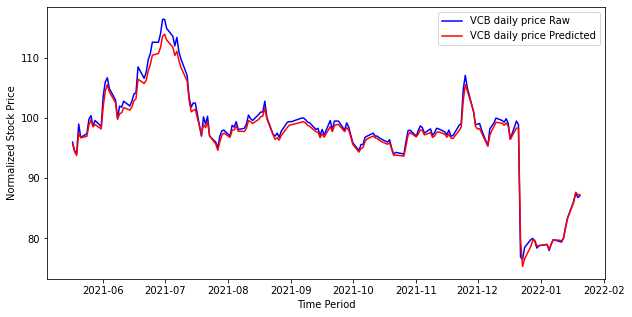

In [14]:
# plot the result
import matplotlib.pyplot as plt

lookback = auto_estimator.get_best_config()['past_seq_len']
groundtruth_unscale = tsdata_test.unscale().to_pandas()[lookback - 1:]

plt.figure(figsize=(10,5))
plt.plot(groundtruth_unscale["date"], groundtruth_unscale["close"], color='blue', label="VCB daily price Raw")
plt.plot(groundtruth_unscale["date"], y_pred[:,0,0], color='red', label="VCB daily price Predicted")
plt.xlabel("Time Period")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.show()

In [15]:
# # save the pipeline
# my_ppl_file_path = "/tmp/saved_pipeline"
# ts_pipeline.save(my_ppl_file_path)

In [16]:
# # restore the pipeline for further deployment
# from bigdl.chronos.autots import TSPipeline
# loaded_ppl = TSPipeline.load(my_ppl_file_path)

In [17]:
# # Stop orca context when your program finishes
# stop_orca_context()

In [18]:
# # show a tensorboard view
# %load_ext tensorboard
# %tensorboard --logdir /tmp/autots_estimator/autots_estimator_leaderboard/